In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from IPython.display import display, HTML


import seaborn as sns
# %matplotlib qt

In [2]:
from IPython.display import display_html
from itertools import chain,cycle

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

## Pandas Dataframes

<center>dataframes $\to$ manipulation $\to$ results/visualisation</center>

Outline:
- Group-by recap
- look-up tables / relational databases
- apply functions to dataframe
- Plotting with seaborn

# A problem from the aerospace industry

Our boss has asked us to calculate how much money each airline spent on aircraft parts last year. 
The data that we have available are:
- <b>fleet data</b>: what types of aircraft each airline has;
- <b>aircraft type to part number</b>: a look-up table that indicates which part number fits to which aircraft type
- <b>cost of each part</b>: a look-up table that indicates how much each part costs to buy

In [70]:
# import fleet
fl = pd.read_csv("airlines_2.csv")
fc = fl.copy()
fl

,airline,ac_type,variant,number
0,Lufthansa,Boeing,737-100,4
1,Lufthansa,Boeing,737-100,3
2,Lufthansa,Boeing,737-100,1
3,Lufthansa,Boeing,737-200,5
4,Lufthansa,Airbus,A380,3
5,Lufthansa,Airbus,A380,6
6,KLM,Airbus,A380,1
7,KLM,Airbus,A380,3
8,KLM,Airbus,A320,3
9,KLM,Airbus,A320,4


In [7]:
# import ac-pn look-up
ac_pn = pd.read_csv("ac_pn.csv")
ac_pn

,variant,pn
0,747,PN-1
1,737-100,PN-2
2,737-200,PN-3
3,A320,PN-4
4,A380,PN-5


In [8]:
display_side_by_side(fl, ac_pn)

,airline,ac_type,variant,number
0,Lufthansa,Boeing,737-100,4
1,Lufthansa,Boeing,737-100,3
2,Lufthansa,Boeing,737-100,1
3,Lufthansa,Boeing,737-200,5
4,Lufthansa,Airbus,A380,3
5,Lufthansa,Airbus,A380,6
6,KLM,Airbus,A380,1
7,KLM,Airbus,A380,3
8,KLM,Airbus,A320,3
9,KLM,Airbus,A320,4


In [10]:
# import pn-cost look-up
pn_cst = pd.read_csv("pn_cost.csv")
pn_cst

,pn,cost
0,PN-1,2174
1,PN-2,3925
2,PN-3,1529
3,PN-4,4926
4,PN-5,987


In [11]:
display_side_by_side(fl, ac_pn, pn_cst)

,airline,ac_type,variant,number
0,Lufthansa,Boeing,737-100,4
1,Lufthansa,Boeing,737-100,3
2,Lufthansa,Boeing,737-100,1
3,Lufthansa,Boeing,737-200,5
4,Lufthansa,Airbus,A380,3
5,Lufthansa,Airbus,A380,6
6,KLM,Airbus,A380,1
7,KLM,Airbus,A380,3
8,KLM,Airbus,A320,3
9,KLM,Airbus,A320,4


## Grouping-by

- slow way to do it:

In [14]:
# Lufthansa sub-dataframe
airln = "Lufthansa"
lh =fl.loc[fl.airline == airln]
lh

,airline,ac_type,variant,number
0,Lufthansa,Boeing,737-100,4
1,Lufthansa,Boeing,737-100,3
2,Lufthansa,Boeing,737-100,1
3,Lufthansa,Boeing,737-200,5
4,Lufthansa,Airbus,A380,3
5,Lufthansa,Airbus,A380,6


In [15]:
# list
lh['variant'].to_list()

['737-100', '737-100', '737-100', '737-200', 'A380', 'A380']

In [16]:
# set
set(lh['variant'].to_list())

{'737-100', '737-200', 'A380'}

In [20]:
# list of set
lh_vars = list(set(lh['variant'].to_list()))
lh_vars

['A380', '737-200', '737-100']

In [26]:
# calculate for variant
var = lh_vars[1]
lh.loc[lh.variant == var]

,airline,ac_type,variant,number
3,Lufthansa,Boeing,737-200,5


In [25]:
lh.loc[lh.variant == var]['number'].sum()

9

In [ ]:
['Lufthansa', 'Airbus', 'A380', 9]

In [ ]:
['Lufthansa', 'Airbus', '737-200', 9]

In [85]:
# calculate for other variant

In [86]:
# create list with summary

- fast way to do it:

In [33]:
fl.groupby(['airline', 'ac_type', 'variant']).sum().reset_index()

,airline,ac_type,variant,number
0,Air France,Airbus,A380,5
1,Air France,Boeing,747,4
2,KLM,Airbus,A320,9
3,KLM,Airbus,A380,4
4,Lufthansa,Airbus,A380,9
5,Lufthansa,Boeing,737-100,8
6,Lufthansa,Boeing,737-200,5


In [29]:
fl

,airline,ac_type,variant,number
0,Lufthansa,Boeing,737-100,4
1,Lufthansa,Boeing,737-100,3
2,Lufthansa,Boeing,737-100,1
3,Lufthansa,Boeing,737-200,5
4,Lufthansa,Airbus,A380,3
5,Lufthansa,Airbus,A380,6
6,KLM,Airbus,A380,1
7,KLM,Airbus,A380,3
8,KLM,Airbus,A320,3
9,KLM,Airbus,A320,4


In [31]:
display_side_by_side(fl_gr, ac_pn, pn_cst)

airline 
 ac_type 
 variant 
 number 
 
 
 
 
 0 
 Air France 
 Airbus 
 A380 
 5 
 
 
 1 
 Air France 
 Boeing 
 747 
 4 
 
 
 2 
 KLM 
 Airbus 
 A320 
 9 
 
 
 3 
 KLM 
 Airbus 
 A380 
 4 
 
 
 4 
 Lufthansa 
 Airbus 
 A380 
 9 
 
 
 5 
 Lufthansa 
 Boeing 
 737-100 
 8 
 
 
 6 
 Lufthansa 
 Boeing 
 737-200 
 5 
 
 
 
 
 
 
 variant 
 pn 
 
 
 
 
 0 
 747 
 PN-1 
 
 
 1 
 737-100 
 PN-2 
 
 
 2 
 737-200 
 PN-3 
 
 
 3 
 A320 
 PN-4 
 
 
 4 
 A380 
 PN-5 
 
 
 
 
 
 
 pn 
 cost 
 
 
 
 
 0 
 PN-1 
 2174 
 
 
 1 
 PN-2 
 3925 
 
 
 2 
 PN-3 
 1529 
 
 
 3 
 PN-4 
 4926 
 
 
 4 
 PN-5 
 987

### Look-up tables

#### - adding a PN column

In [35]:
# display_side_by_side
ac_pn

,variant,pn
0,747,PN-1
1,737-100,PN-2
2,737-200,PN-3
3,A320,PN-4
4,A380,PN-5


In [37]:
# create dictionary
ac_lu = dict(zip(ac_pn.variant, ac_pn.pn))
ac_lu

{'747': 'PN-1',
 '737-100': 'PN-2',
 '737-200': 'PN-3',
 'A320': 'PN-4',
 'A380': 'PN-5'}

In [42]:
ac_lu

{'747': 'PN-1',
 '737-100': 'PN-2',
 '737-200': 'PN-3',
 'A320': 'PN-4',
 'A380': 'PN-5'}

In [47]:
variant = '737-200'
fl_gr.loc[fl_gr.variant == variant, "PN"] = ac_lu[variant]
fl_gr

,airline,ac_type,variant,number,PN
0,Air France,Airbus,A380,5,PN-5
1,Air France,Boeing,747,4,PN-1
2,KLM,Airbus,A320,9,PN-4
3,KLM,Airbus,A380,4,PN-5
4,Lufthansa,Airbus,A380,9,PN-5
5,Lufthansa,Boeing,737-100,8,PN-2
6,Lufthansa,Boeing,737-200,5,PN-3


- alternative: for-loop

In [71]:
for vrnt in ["737-100", "737-200", "A380", "A320", "747"]:
    fc.loc[fc.variant == vrnt, "PN"] = ac_lu[vrnt]

In [91]:
# show

#### - adding cost column

In [48]:
display_side_by_side(fl_gr, pn_cst)

airline 
 ac_type 
 variant 
 number 
 PN 
 
 
 
 
 0 
 Air France 
 Airbus 
 A380 
 5 
 PN-5 
 
 
 1 
 Air France 
 Boeing 
 747 
 4 
 PN-1 
 
 
 2 
 KLM 
 Airbus 
 A320 
 9 
 PN-4 
 
 
 3 
 KLM 
 Airbus 
 A380 
 4 
 PN-5 
 
 
 4 
 Lufthansa 
 Airbus 
 A380 
 9 
 PN-5 
 
 
 5 
 Lufthansa 
 Boeing 
 737-100 
 8 
 PN-2 
 
 
 6 
 Lufthansa 
 Boeing 
 737-200 
 5 
 PN-3 
 
 
 
 
 
 
 pn 
 cost 
 
 
 
 
 0 
 PN-1 
 2174 
 
 
 1 
 PN-2 
 3925 
 
 
 2 
 PN-3 
 1529 
 
 
 3 
 PN-4 
 4926 
 
 
 4 
 PN-5 
 987

In [50]:
# create dictionary
pn_lu = dict(zip(pn_cst.pn, pn_cst.cost))
pn_lu

{'PN-1': 2174, 'PN-2': 3925, 'PN-3': 1529, 'PN-4': 4926, 'PN-5': 987}

In [58]:
pn = 'PN-4'
fl_gr.loc[fl_gr.PN == pn, "cost/part"] = pn_lu[pn]
fl_gr

,airline,ac_type,variant,number,PN,cost/part
0,Air France,Airbus,A380,5,PN-5,987.0
1,Air France,Boeing,747,4,PN-1,2174.0
2,KLM,Airbus,A320,9,PN-4,4926.0
3,KLM,Airbus,A380,4,PN-5,987.0
4,Lufthansa,Airbus,A380,9,PN-5,987.0
5,Lufthansa,Boeing,737-100,8,PN-2,3925.0
6,Lufthansa,Boeing,737-200,5,PN-3,1529.0


- alternative: for-loop

In [112]:
# for-loop

In [72]:
for pn in ["PN-1", "PN-2", "PN-3", "PN-4", "PN-5"]:
    fc.loc[fc.PN == pn, "cost/part"] = pn_lu[pn]

In [59]:
# show fl grouped-by
fl_gr

,airline,ac_type,variant,number,PN,cost/part
0,Air France,Airbus,A380,5,PN-5,987.0
1,Air France,Boeing,747,4,PN-1,2174.0
2,KLM,Airbus,A320,9,PN-4,4926.0
3,KLM,Airbus,A380,4,PN-5,987.0
4,Lufthansa,Airbus,A380,9,PN-5,987.0
5,Lufthansa,Boeing,737-100,8,PN-2,3925.0
6,Lufthansa,Boeing,737-200,5,PN-3,1529.0


In [109]:
#create total cost coliumn

In [60]:
fl_gr['total cost'] = fl_gr['number'] * fl_gr['cost/part']

In [61]:
#show fc
fl_gr

,airline,ac_type,variant,number,PN,cost/part,total cost
0,Air France,Airbus,A380,5,PN-5,987.0,4935.0
1,Air France,Boeing,747,4,PN-1,2174.0,8696.0
2,KLM,Airbus,A320,9,PN-4,4926.0,44334.0
3,KLM,Airbus,A380,4,PN-5,987.0,3948.0
4,Lufthansa,Airbus,A380,9,PN-5,987.0,8883.0
5,Lufthansa,Boeing,737-100,8,PN-2,3925.0,31400.0
6,Lufthansa,Boeing,737-200,5,PN-3,1529.0,7645.0


In [67]:
fl_al=fl_gr.groupby('airline').sum(numeric_only =True).reset_index()
fl_al.pop('cost/part')

0    3161.0
1    5913.0
2    6441.0
Name: cost/part, dtype: float64

In [68]:
fl_al

,airline,number,total cost
0,Air France,9,13631.0
1,KLM,13,48282.0
2,Lufthansa,22,47928.0


In [30]:
# display_side_by_side

,airline,ac_type,variant,number
0,Lufthansa,Boeing,737-100,4
1,Lufthansa,Boeing,737-100,3
2,Lufthansa,Boeing,737-100,1
3,Lufthansa,Boeing,737-200,5
4,Lufthansa,Airbus,A380,3
5,Lufthansa,Airbus,A380,6
6,KLM,Airbus,A380,1
7,KLM,Airbus,A380,3
8,KLM,Airbus,A320,3
9,KLM,Airbus,A320,4


In [31]:
fl_al = fl_gr.groupby('airline').sum(numeric_only = True).reset_index()
fl_al

,airline,number,cost/part,total cost
0,Air France,9,3161.0,13631.0
1,KLM,13,5913.0,48282.0
2,Lufthansa,22,6441.0,47928.0


## Seaborn plotting

- distplot (distributions)
- relplot (relational)
- catplot (categorical)

In [74]:
fc['total cost'] = fc['number']*fc['cost/part']

In [75]:
fc

,airline,ac_type,variant,number,PN,cost/part,total cost
0,Lufthansa,Boeing,737-100,4,PN-2,3925.0,15700.0
1,Lufthansa,Boeing,737-100,3,PN-2,3925.0,11775.0
2,Lufthansa,Boeing,737-100,1,PN-2,3925.0,3925.0
3,Lufthansa,Boeing,737-200,5,PN-3,1529.0,7645.0
4,Lufthansa,Airbus,A380,3,PN-5,987.0,2961.0
5,Lufthansa,Airbus,A380,6,PN-5,987.0,5922.0
6,KLM,Airbus,A380,1,PN-5,987.0,987.0
7,KLM,Airbus,A380,3,PN-5,987.0,2961.0
8,KLM,Airbus,A320,3,PN-4,4926.0,14778.0
9,KLM,Airbus,A320,4,PN-4,4926.0,19704.0


## distplot (distributions)

<AxesSubplot:xlabel='airline', ylabel='Count'>

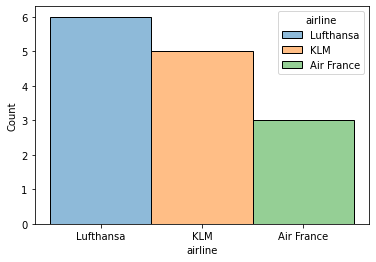

In [80]:
# histplot
sns.histplot(data = fc, x = 'airline', hue = 'airline')

<AxesSubplot:xlabel='ac_type', ylabel='Count'>

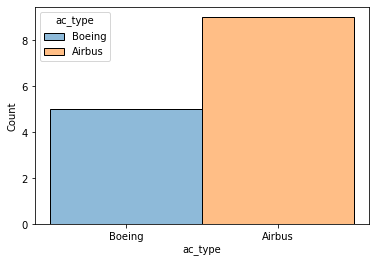

In [81]:
# histplot
sns.histplot(data = fc, x = 'ac_type', hue = 'ac_type')

<AxesSubplot:xlabel='variant', ylabel='Count'>

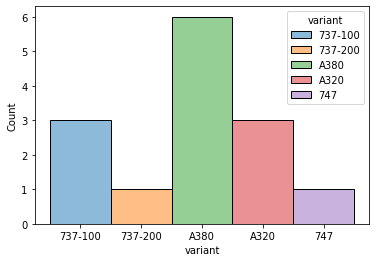

In [82]:
# histplot
sns.histplot(data = fc, x = 'variant', hue = 'variant')

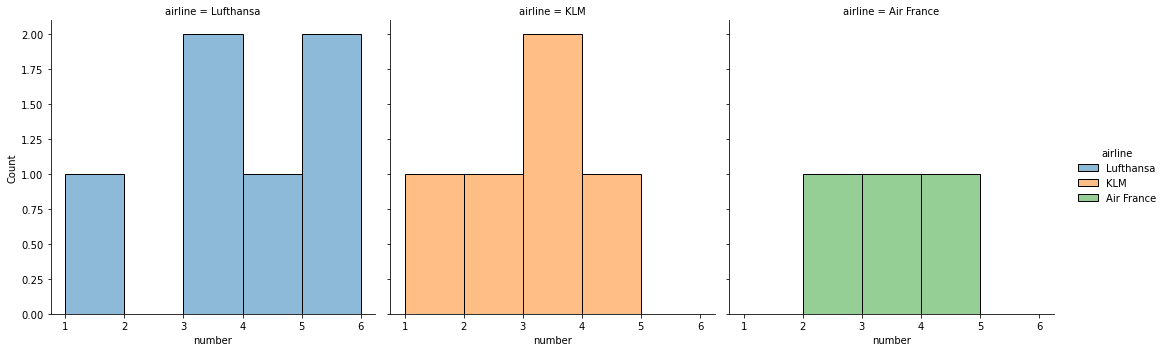

In [85]:
#show fc
sns.displot(data = fc, x = "number", hue = 'airline', col = "airline")

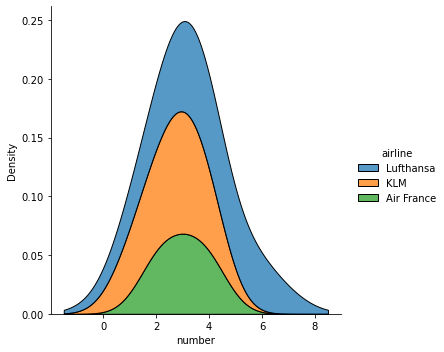

In [87]:
# distplot
sns.displot(data = fc, x = "number", hue = 'airline', multiple = "stack", kind = "kde")

In [101]:
# distplot

## relplot (relational)

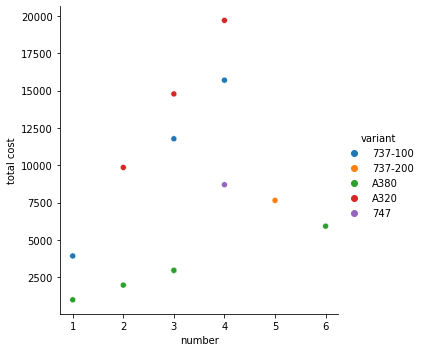

In [91]:
# relplot
sns.relplot(data = fc, x = 'number', y = 'total cost', hue = "variant")

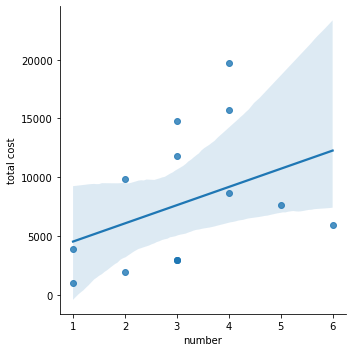

In [92]:
# relplot
sns.lmplot(data = fc, x = 'number', y = 'total cost')

In [105]:
#lmplot

## relational + distributions

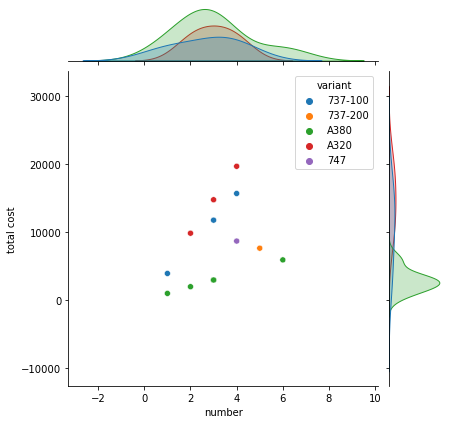

In [96]:
# jointplot
sns.jointplot(data = fc, x = "number", y = "total cost", hue = "variant")

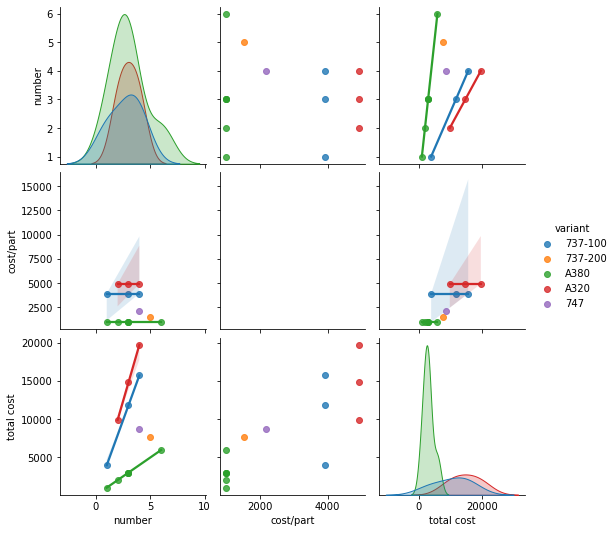

In [101]:
# jointplot
sns.pairplot(data = fc, kind = "reg", hue = "variant")

In [102]:
# pairplot